<div style='background-image: url("../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Instaseis Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Part 2: First Basic Exercise</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Martin van Driel ([@martinvandriel](https://github.com/martinvandriel))
* Lion Krischer ([@krischer](https://github.com/krischer))
---

<img style="width:50%" src="images/logo.png">

## First Basic Exercise

**Task:** Calculate three component synthetic seismograms for the stations and events in the **data/events** and **data/stations** subdirectories and save them on disc.

#### Notes

1. Receiver objects can also be created from StationXML, SEED, or STATIONS files as well as obpy inventories using `instaseis.Receiver.parse()`; see the [documentation](http://www.instaseis.net/source.html#receiver) for details.
2. Source objects can also be created from QuakeML, CMTSOLUTIONS, and in other ways using `instaseis.Source.parse()`; see the [documentation](http://www.instaseis.net/source.html#source) for details.
3. The `get_seismograms()` method has a couple of extra arguments:
  * `kind`: `displacement`, `velocity`, `acceleration`
  * `remove_source_shift`, `reconvolve_stf`, `dt`,
  
  ... see the [documentation](http://www.instaseis.net/instaseis.html#instaseis.base_instaseis_db.BaseInstaseisDB.get_seismograms) for details.
4. You can use the properties of the Receiver and Source objects to create usefull filenames.

-----

Basic lines to set up the notebook and some paths.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import obspy
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

Import Instaseis and open the database:

In [2]:
import instaseis
db = instaseis.open_db("data/database")

-----

### 1. Load Receivers

**reminder:** you can use ObsPy to load stations and plot a map:

/Users/lion/miniconda3/envs/seismo_live/lib/python3.7/site-packages/obspy/imaging/maps.py:45: UserWarning: basemap/pyproj with proj4 version >= 5 has a bug that results in inverted map axes. Your maps may be wrong. Please use another version of proj4, or use cartopy.
  warnings.warn(msg)


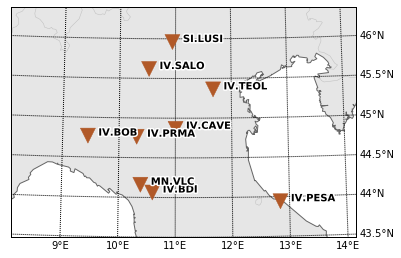

In [3]:
from obspy import read_inventory

inventory = read_inventory('data/stations/all_stations.xml')
inventory.plot(projection="local", resolution="i");

This inventory can directly be used as input to generate a list of `instaseis.Receiver` objects:

In [4]:
receivers = instaseis.Receiver.parse(inventory)
for rec in receivers[:2]:
    print(rec)

Instaseis Receiver:
	Longitude :   10.6 deg
	Latitude  :   43.9 deg
	Network   : IV
	Station   : BDI
	Location  : 

Instaseis Receiver:
	Longitude :    9.4 deg
	Latitude  :   44.6 deg
	Network   : IV
	Station   : BOB
	Location  : 



**Alternatively**, instaseis can directly open the station xml or STATIONS file (but then you don't have the nice plot):

In [5]:
receivers = instaseis.Receiver.parse('data/stations/all_stations.xml')
print(receivers[0])
receivers = instaseis.Receiver.parse('data/stations/STATIONS')
print(receivers[0])

Instaseis Receiver:
	Longitude :   10.6 deg
	Latitude  :   43.9 deg
	Network   : IV
	Station   : BDI
	Location  : 

Instaseis Receiver:
	Longitude :   10.6 deg
	Latitude  :   43.9 deg
	Network   : IV
	Station   : BDI
	Location  : 



### 2. Load Events
**reminder:** use ObsPy to load events from a QuakeML file containing all events and plot a map:

6 Event(s) in Catalog:
2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc
2015-04-25T06:11:58.400000Z | +27.770,  +85.370 | 7.9 Mwc
2014-04-04T01:37:57.900000Z | -20.610,  -70.910 | 6.2 Mwc
2015-01-23T06:51:20.340000Z | +44.127,  +11.121 | 4.3 Mw | manual
2015-05-12T07:05:28.500000Z | +27.560,  +86.100 | 7.2 Mwc
2012-05-29T07:00:02.880000Z | +44.842,  +11.066 | 5.6 Mw | manual
Instaseis Source:
	Origin Time      : 2014-04-01T23:47:31.500000Z
	Longitude        :  -70.8 deg
	Latitude         :  -19.6 deg
	Depth            : 2.2e+01 km km
	Moment Magnitude :   8.12
	Scalar Moment    :   1.90e+21 Nm
	Mrr              :   9.20e+20 Nm
	Mtt              :  -3.90e+19 Nm
	Mpp              :  -8.81e+20 Nm
	Mrt              :   6.37e+20 Nm
	Mrp              :  -1.53e+21 Nm
	Mtp              :   2.05e+20 Nm



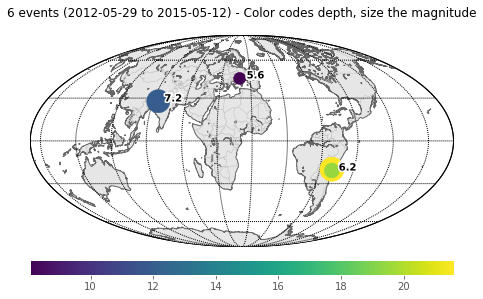

In [6]:
import glob # provides iterator to loop over files

cat = obspy.core.event.Catalog()

for filename in glob.iglob('data/events/quakeml/*.xml'):
     cat += obspy.read_events(filename)
        
print(cat)
print(instaseis.Source.parse(cat.events[0]))
cat.plot();

**Alternatively** load QuakeML or CMTSOLUTION files directly using `instaseis.Source.parse()` and store the sources in a list:

In [7]:
sources = []

for filename in glob.iglob('data/events/quakeml/*.xml'):
    sources.append(instaseis.Source.parse(filename))
    
print(sources[0])

for filename in glob.iglob('data/events/cmtsolutions/*'):
    sources.append(instaseis.Source.parse(filename))

print(sources[0])

Instaseis Source:
	Origin Time      : 2014-04-01T23:47:31.500000Z
	Longitude        :  -70.8 deg
	Latitude         :  -19.6 deg
	Depth            : 2.2e+01 km km
	Moment Magnitude :   8.12
	Scalar Moment    :   1.90e+21 Nm
	Mrr              :   9.20e+20 Nm
	Mtt              :  -3.90e+19 Nm
	Mpp              :  -8.81e+20 Nm
	Mrt              :   6.37e+20 Nm
	Mrp              :  -1.53e+21 Nm
	Mtp              :   2.05e+20 Nm

Instaseis Source:
	Origin Time      : 2014-04-01T23:47:31.500000Z
	Longitude        :  -70.8 deg
	Latitude         :  -19.6 deg
	Depth            : 2.2e+01 km km
	Moment Magnitude :   8.12
	Scalar Moment    :   1.90e+21 Nm
	Mrr              :   9.20e+20 Nm
	Mtt              :  -3.90e+19 Nm
	Mpp              :  -8.81e+20 Nm
	Mrt              :   6.37e+20 Nm
	Mrp              :  -1.53e+21 Nm
	Mtp              :   2.05e+20 Nm



### 3. Extract Seismograms and Save to File

For the first solution using a ObsPy event catalog:

#### Solutions:

In [8]:
dt = 1.0

for event in cat:
    src = instaseis.Source.parse(event)
    srcname = '%s_Mw_%3.1f' % (src.origin_time.date, src.moment_magnitude)
    for rec in receivers:
        # create a usefull filename
        recname = '%s_%s' % (rec.network, rec.station)
        filename = '%s_%s' % (recname, srcname)
        filename = filename.replace('.', '_')
        
        # extract seismograms using instaseis
        st = db.get_seismograms(source=src, receiver=rec, dt=dt)
        
        # write to miniseed files in the data_out folder. Write as MiniSEED due to multi
        # component support.
        st.write(os.path.join('data_out', filename + '.mseed'), format='mseed')

For the second solution use a list of sources:

#### Solutions:

In [9]:
dt = 1.0

for src in sources:
    srcname = '%s_Mw_%3.1f' % (src.origin_time.date, src.moment_magnitude)
    for rec in receivers:
        # create a usefull filename
        recname = '%s_%s' % (rec.network, rec.station)
        filename = '%s_%s' % (recname, srcname)
        filename = filename.replace('.', '_')
        
        # extract seismograms using instaseis
        st = db.get_seismograms(source=src, receiver=rec, dt=dt)
        
        # write to miniseed files in the data_out folder. Write as MiniSEED due to multi
        # component support.
        st.write(os.path.join('data_out', filename + '.mseed'), format='mseed')

Check the data:

ls data_out/